In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
df0 = pd.read_csv('pairs_volume_V3_12032022.csv').drop('Unnamed: 0', axis=1)
df0['time'] = pd.to_datetime(df0['poolDayDatas.date'],unit='s')
df0 = df0.set_index('time')
df0['pair'] = df0['poolDayDatas.pool.token0.symbol']+'/'+df0['poolDayDatas.pool.token1.symbol']

In [3]:
triplets = pd.read_excel("v3_triplets.xlsx")
tokenid = pd.read_excel("v3_tokenid.xlsx")
tokenid_dict = dict(zip(tokenid.token, tokenid.id))

In [4]:
tokenid_dict

{'ETH': '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2',
 'USDC': '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48',
 'DAI': '0x6b175474e89094c44da98b954eedeac495271d0f',
 'USDT': '0xdac17f958d2ee523a2206206994597c13d831ec7',
 'AAVE': '0x7fc66500c84a76ad7e9c93437bfc5ac33e2ddae9',
 'PAX': '0x8e870d67f660d95d5be530380d0ec0bd388289e1',
 'LUNA': '0xd2877702675e6ceb975b4a1dff9fb7baf4c91ea9',
 'SHIB': '0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce',
 'MATIC': '0x7d1afa7b718fb893db30a3abc0cfc608aacfebb0',
 'WBTC': '0x2260fac5e5542a773aa44fbcfedf7c193bc2c599',
 'LINK': '0x514910771af9ca656af840dff83e8264ecf986ca',
 'UNI': '0x1f9840a85d5af5bf1d1762f925bdaddc4201f984',
 'FTT': '0x50d1c9771902476076ecfc8b2a83ad6b9355a4c9',
 'MANA': '0x0f5d2fb29fb7d3cfee444a200298f468908cc942',
 'SAND': '0x3845badade8e6dff049820680d1f14bd3903a5d0',
 'AXS': '0xbb0e17ef65f82ab018d8edd776e8dd940327b28b',
 'RUNE': '0x3155ba85d5f96b2d030a4966af206230e46849cb',
 'MKR': '0x9f8f72aa9304c8b593d555f12ef6589cc3a579a2',
 'GRT': '0xc944e

In [5]:
gas = pd.read_csv('exportAvgGasPrice.csv', parse_dates=['Date(UTC)'])
gas = gas.rename(columns={"Date(UTC)": "time","Value (Wei)":"gasinwei"})
gas["time"] = gas["time"].dt.normalize()
gas = gas.set_index("time")
gas = gas.sort_values(by='time')

ethp = pd.read_csv('exportEtherPrice.csv', parse_dates=['Date(UTC)']).drop('UnixTimeStamp',axis=1)
ethp = ethp.rename(columns={"Date(UTC)": "time","Value":"eth_price"})
ethp["time"] = ethp["time"].dt.normalize()
ethp = ethp.set_index("time")
ethp = ethp.sort_values(by='time')
df=df0.join(gas).join(ethp)
df['gas_usd']=df['gasinwei']*df['eth_price']/1000000000000000000

<ipython-input-6-57a7f8fb28bd>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
<ipython-input-6-57a7f8fb28bd>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
<ipython-input-6-57a7f8fb28bd>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
<ipytho

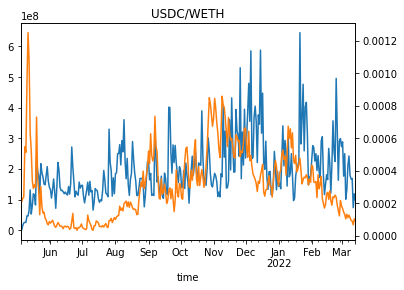

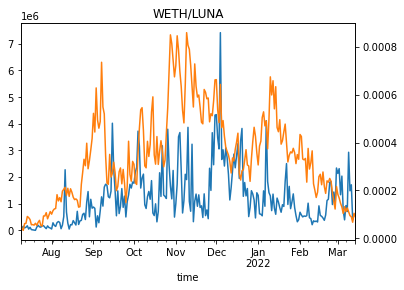

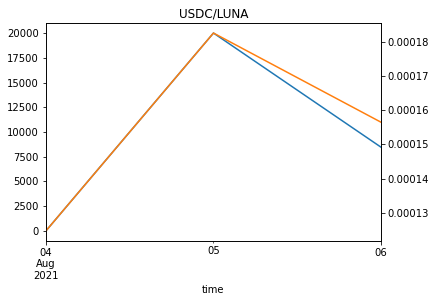

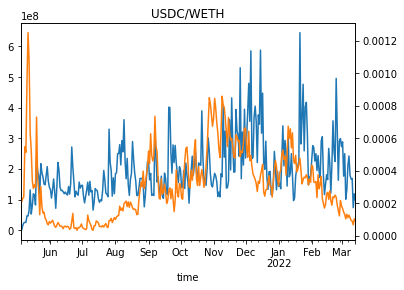

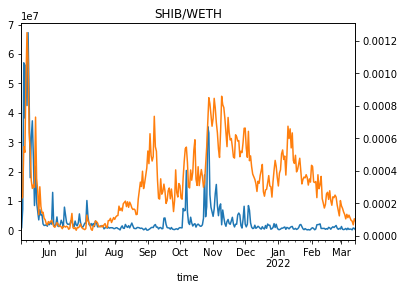

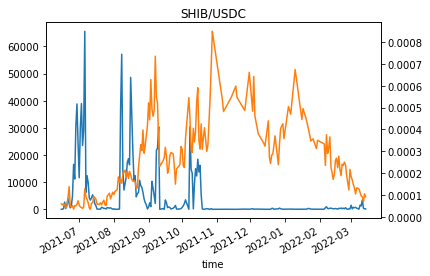

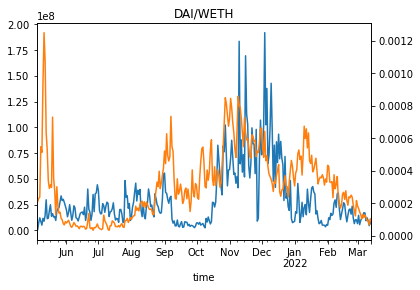

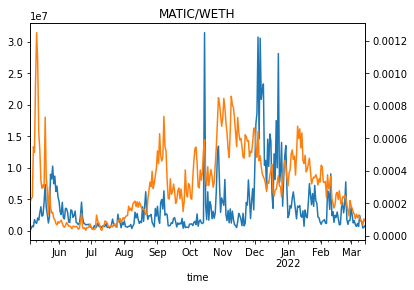

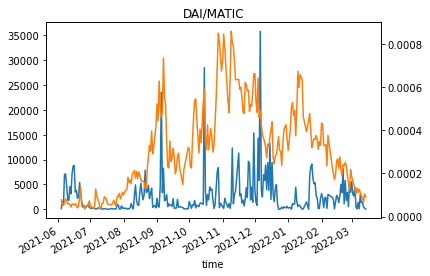

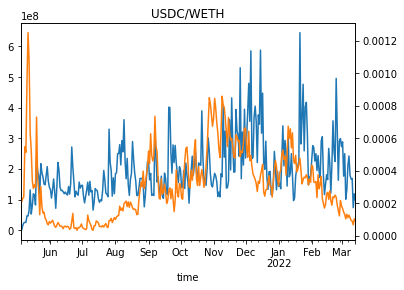

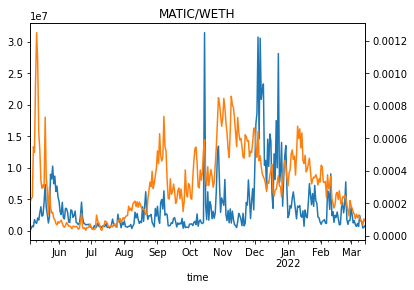

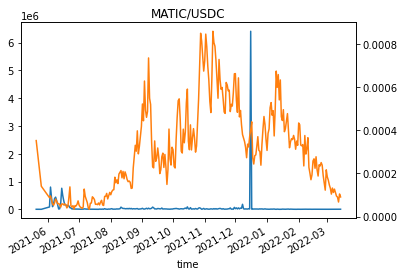

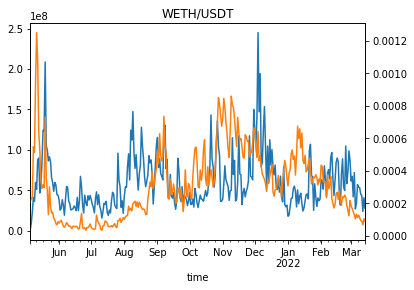

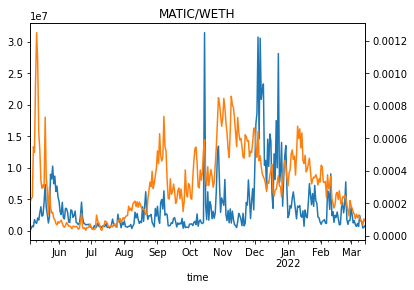

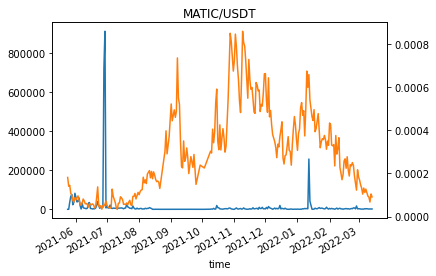

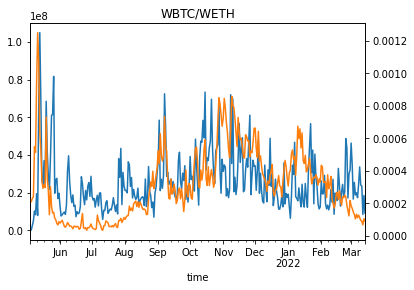

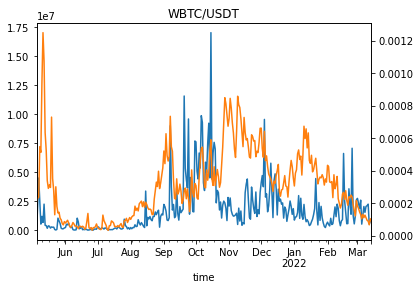

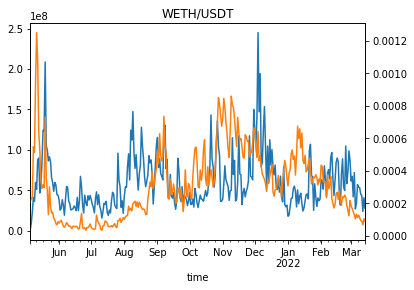

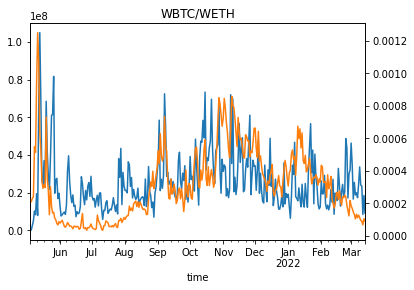

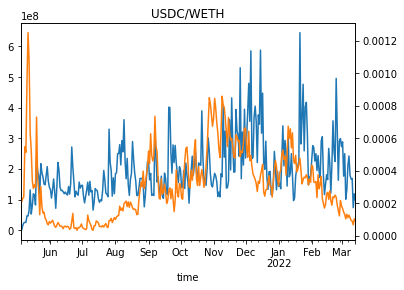

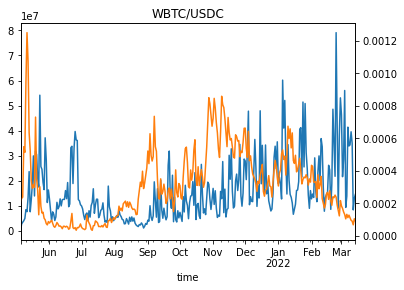

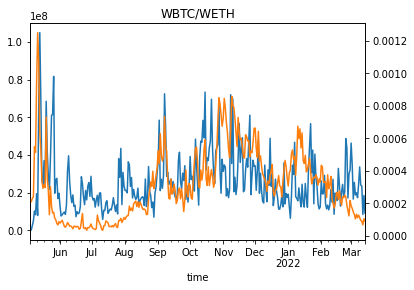

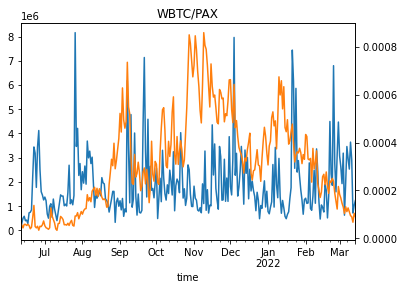

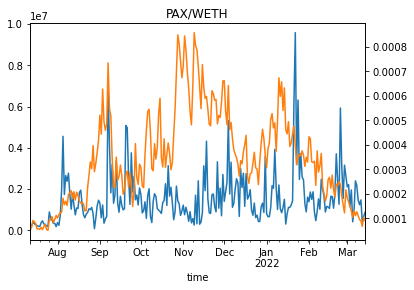

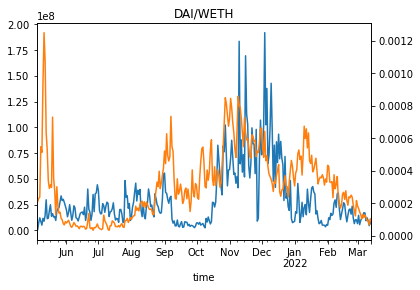

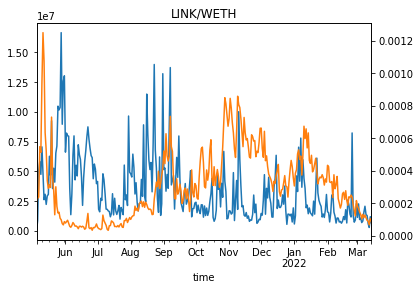

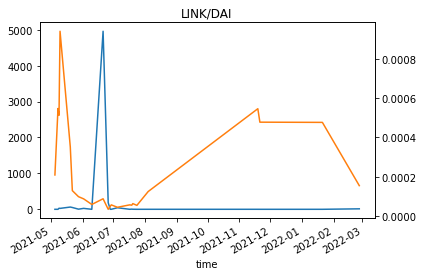

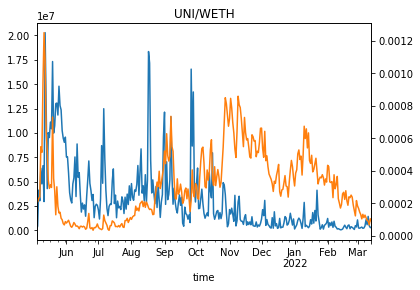

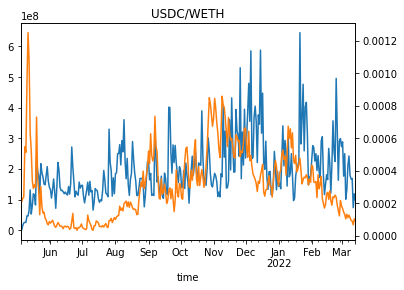

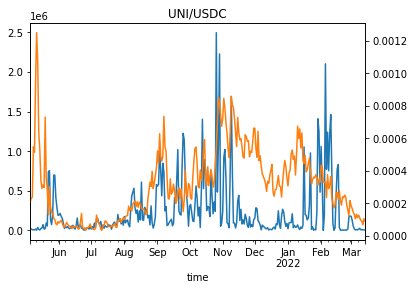

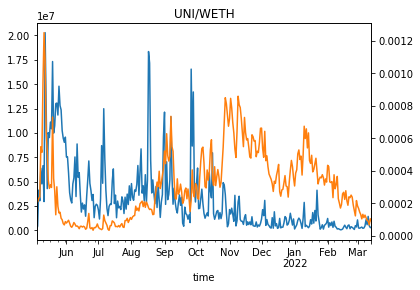

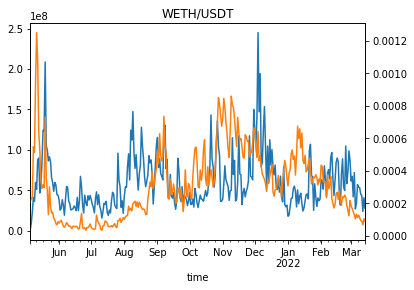

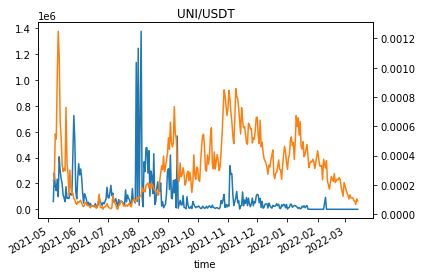

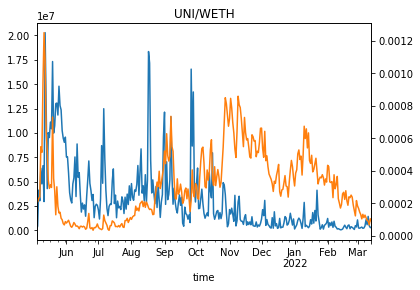

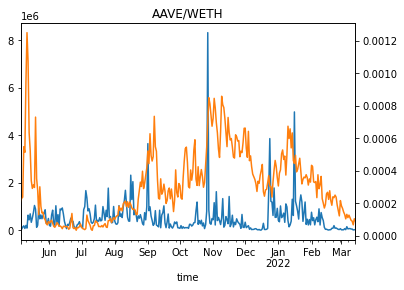

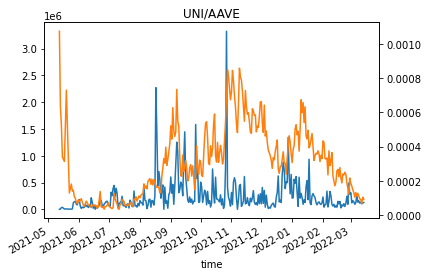

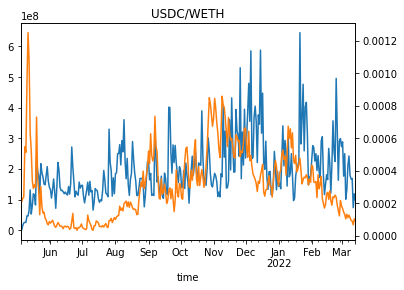

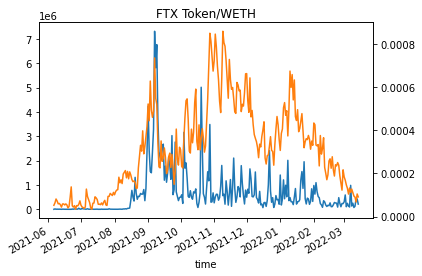

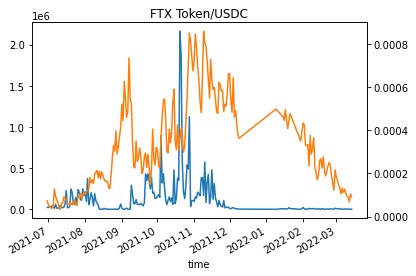

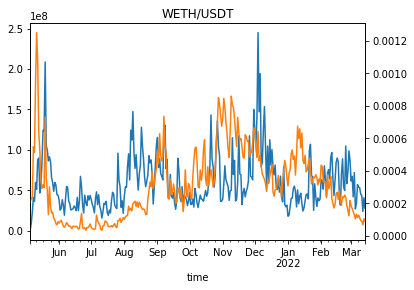

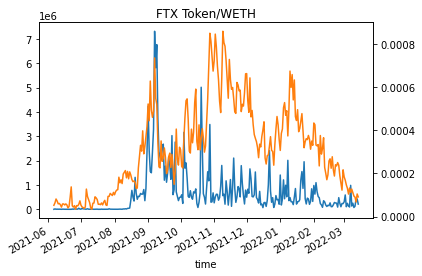

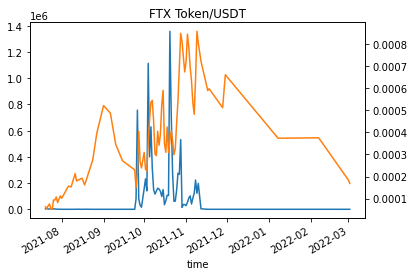

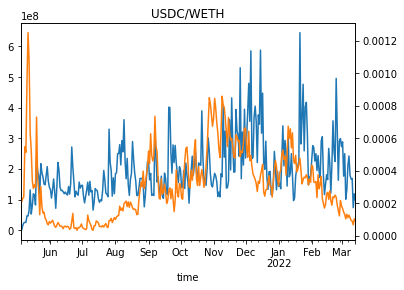

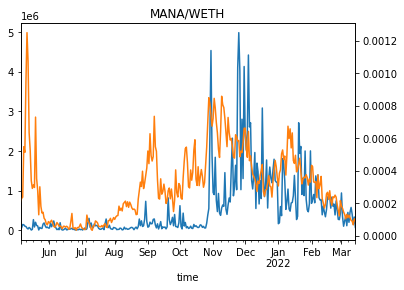

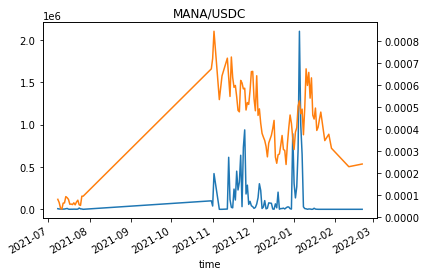

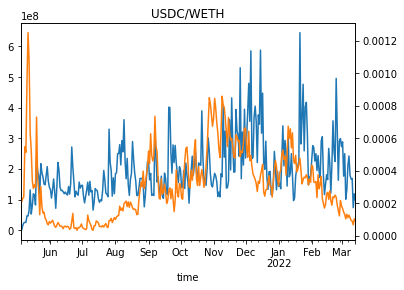

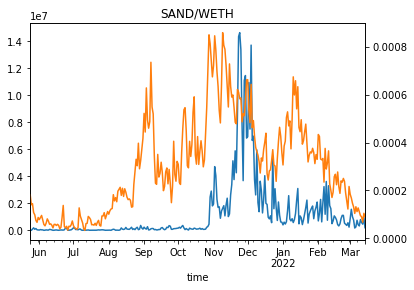

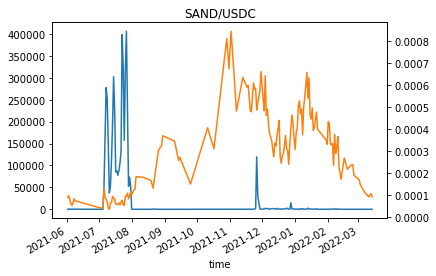

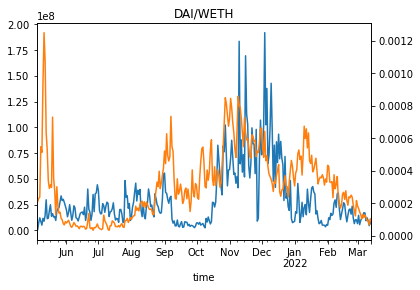

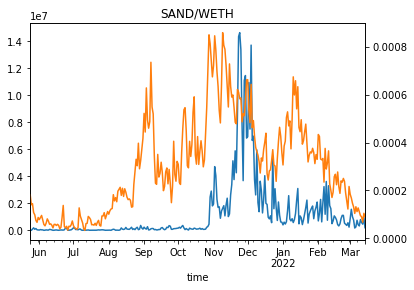

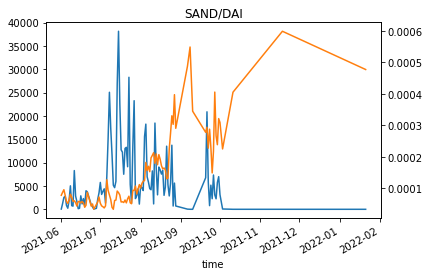

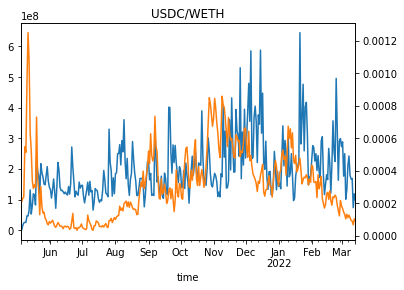

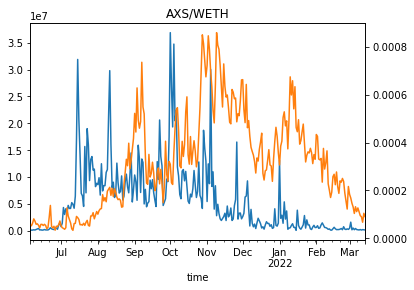

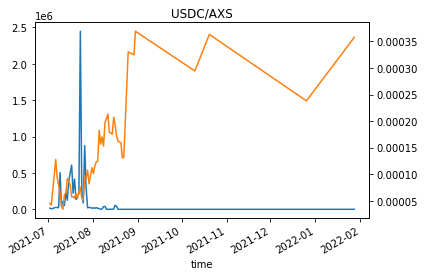

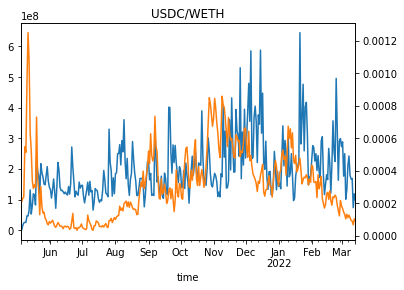

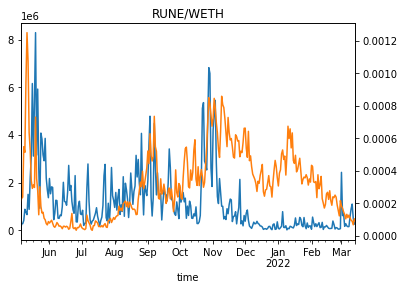

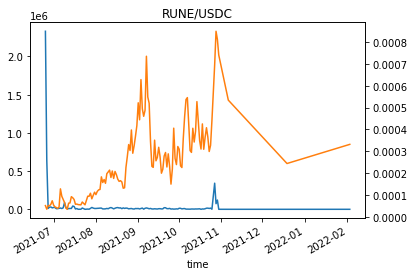

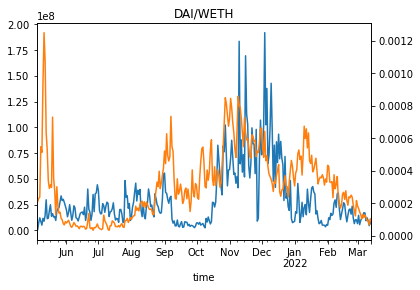

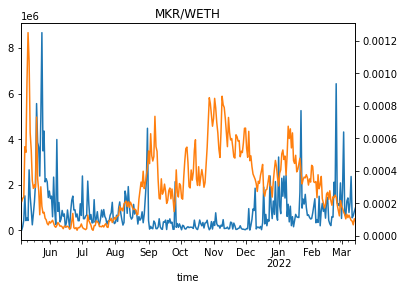

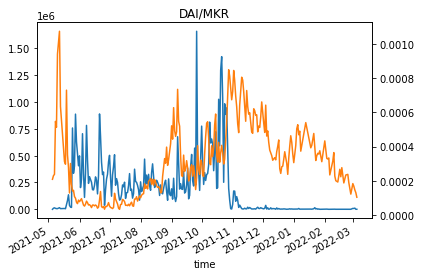

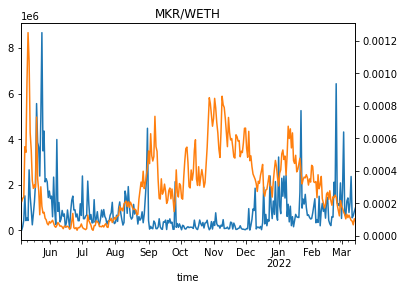

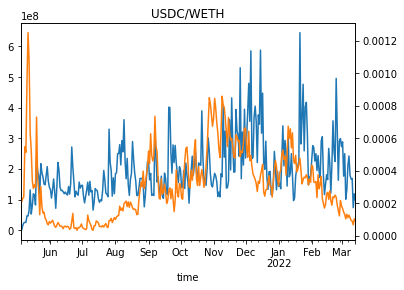

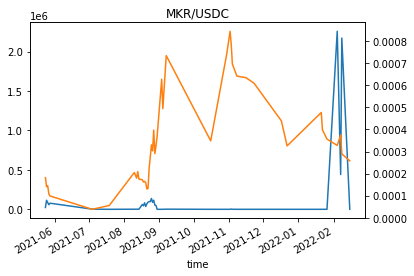

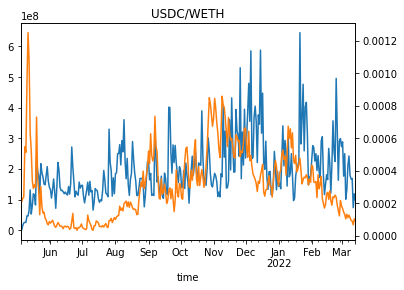

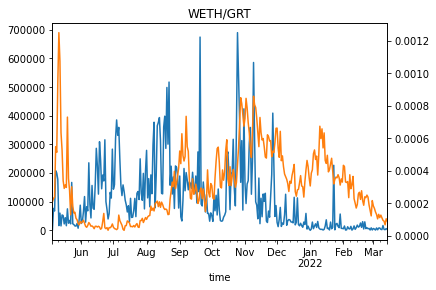

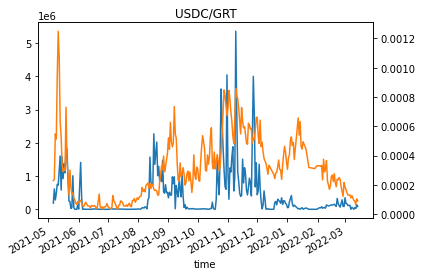

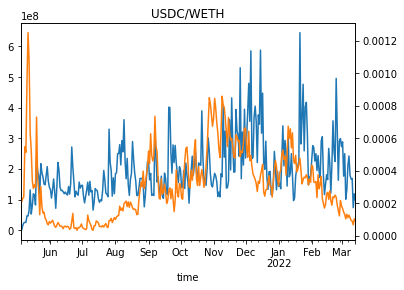

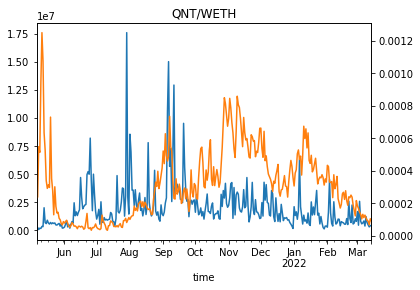

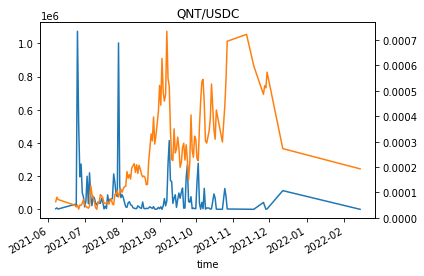

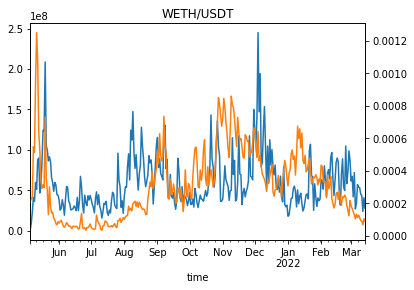

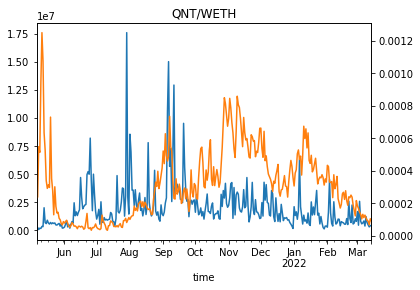

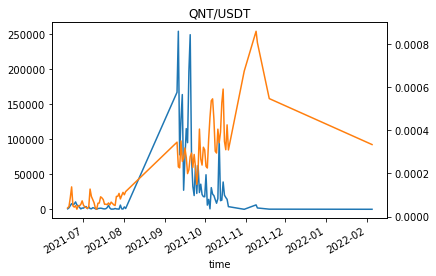

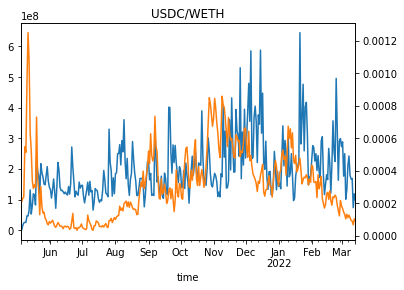

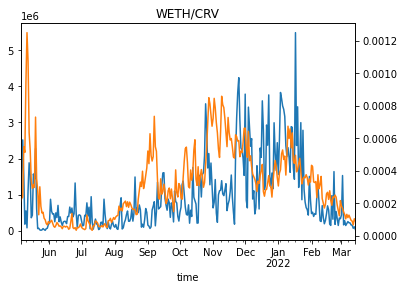

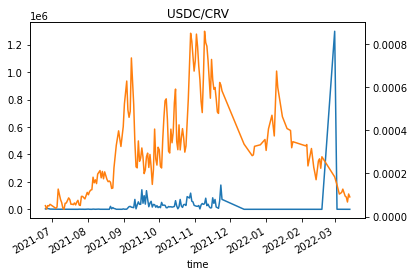

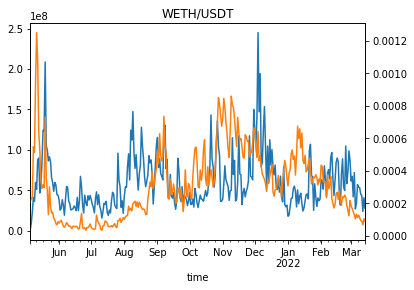

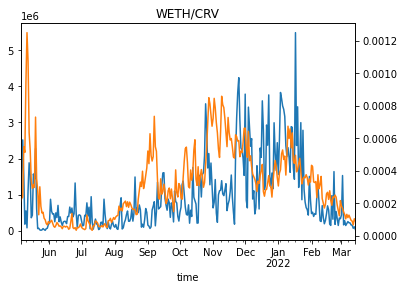

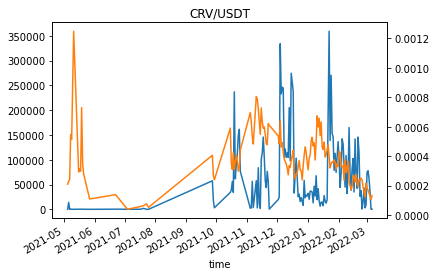

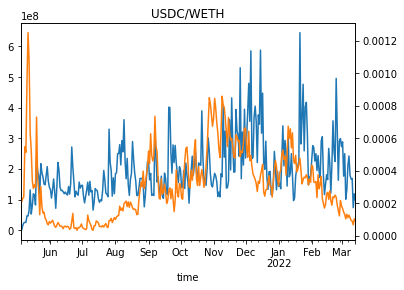

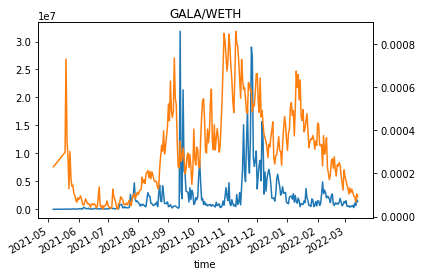

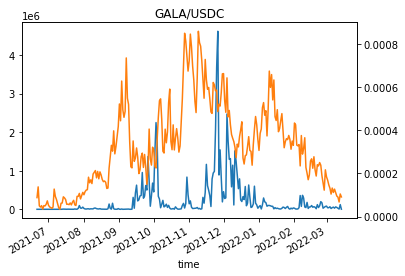

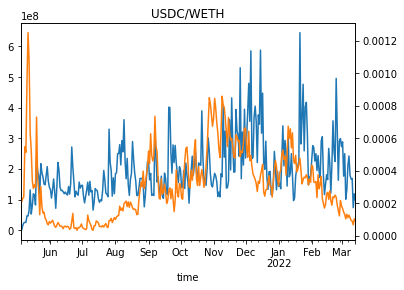

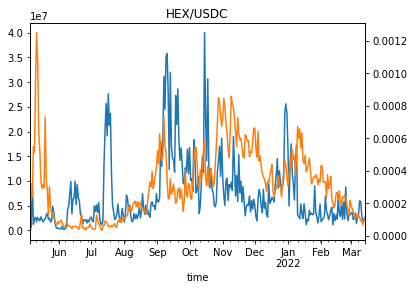

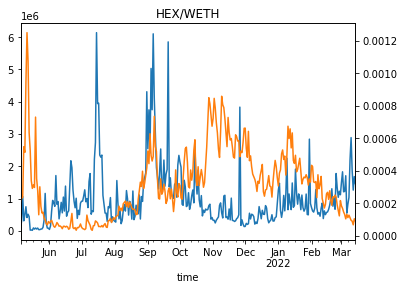

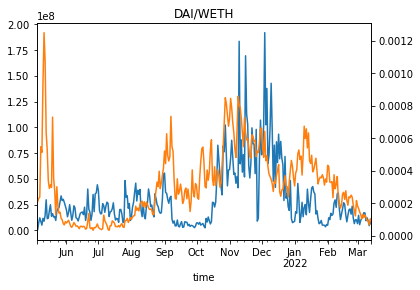

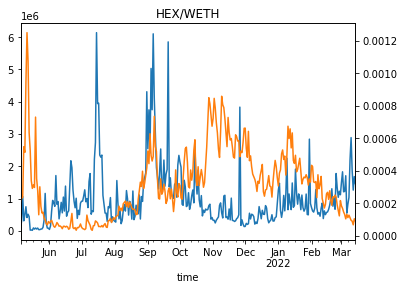

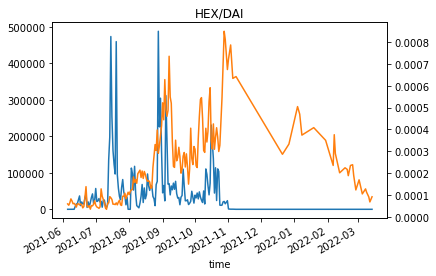

In [6]:
# 
for i in range(len(triplets)):
    triplet_list = []
    triplet_list = [tokenid_dict[triplets.iloc[i].token1],tokenid_dict[triplets.iloc[i].token2],tokenid_dict[triplets.iloc[i].token3]]
    triplet_list_symbol = [triplets.iloc[i].token1,triplets.iloc[i].token2,triplets.iloc[i].token3]
    mask_triplet = (df['poolDayDatas.pool.token0.id'].isin(triplet_list)) & (df['poolDayDatas.pool.token1.id'].isin(triplet_list))
    df_triplet = df[mask_triplet]
    for pair in df_triplet.pair.unique():
        temp_df=df_triplet[df_triplet['pair']== pair]
        temp_df = temp_df.groupby('time').mean()
        fig, ax = plt.subplots()
        temp_df['poolDayDatas.volumeUSD'].plot(title=pair)
        temp_df.gas_usd.plot(y = 'gas_usd', secondary_y = True) 
    
#     pairset = set((df_triplet['poolDayDatas.pool.token0.id'],poolDayDatas.pool.token1.id))
#     fig, ax = plt.subplots()
#     tempmean_df = df_triplet.groupby(['time','pair']).mean()
#     for pair in tempmean_df.index.get_level_values(1).unique():
#         tempmean_df[tempmean_df['pair']==pair].plot(x='time', y='volumeUSD')

eth usdc 0.05 0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640
eth usdc 0.3 0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8
matic eth 0.3 0x290a6a7460b308ee3f19023d2d00de604bcf5b42
matic eth 1.0  0x99c7550be72f05ec31c446cd536f8a29c89fdb77   
matic usdc 0.3 0x07a6e955ba4345bae83ac2a6faa771fddd8a2011



targetlist = ['0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8',
              '0x290a6a7460b308ee3f19023d2d00de604bcf5b42','0x07a6e955ba4345bae83ac2a6faa771fddd8a2011']
mask = (df['poolDayDatas.pool.id']=='0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8') | (df['poolDayDatas.pool.id']=='0x290a6a7460b308ee3f19023d2d00de604bcf5b42') | (df['poolDayDatas.pool.id']=='0x07a6e955ba4345bae83ac2a6faa771fddd8a2011')
dftest= df[mask]

for pool in targetlist:
    fig, ax = plt.subplots()
    df[df['poolDayDatas.pool.id']==pool]['poolDayDatas.volumeUSD'].plot(title=df[df['poolDayDatas.pool.id']==pool].pair[0])
    df[df['poolDayDatas.pool.id']==pool].plot(y = 'gas_usd', ax = ax, secondary_y = True) 

In [7]:
# def dfplot(X, Y):
#     fig, ax1 = plt.subplots()
#     ax1.legend()
#     plt.show()
# plt.rcParams["figure.figsize"] = [7.50, 3.50]
# plt.rcParams["figure.autolayout"] = True
# for pool in df['poolDayDatas.pool.id'].unique():
#     df[df['poolDayDatas.pool.id']==pool]['poolDayDatas.volumeUSD'].plot(figsize=(18,18), label=pool, legend=True)
# #     dfplot(df[df['poolDayDatas.pool.id']==pool].index,df[df['poolDayDatas.pool.id']==pool]['poolDayDatas.volumeUSD'])
#     plt.legend(bbox_to_anchor=(1.0, 1.0))



In [8]:
# for pool in df['poolDayDatas.pool.id'].unique():
#     fig, ax1= plt.subplots()
#     plt.plot(df[df['poolDayDatas.pool.id']==pool]['poolDayDatas.volumeUSD'])
#     plt.show()